In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load and split data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN [samples, height, width, channels]
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels (needed for categorical_crossentropy)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_cnn_model(activation='relu', output_activation='softmax'):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation=activation, input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(10, activation=output_activation))
    return model


In [ ]:
def build_cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # For MNIST classification
    ])
    return model


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
import time

results = []

# Remove eager mode setting; it's not needed here
# tf.config.run_functions_eagerly(True)

for loss_fn in ['sparse_categorical_crossentropy', 'categorical_crossentropy', 'mean_squared_error']:
    for opt_name in ['adam', 'sgd', 'rmsprop', 'adagrad']:
        for batch_size in [32, 64]:
            model = build_cnn_model()  # Define this earlier

            # Use one-hot encoding only when needed
            if loss_fn in ['categorical_crossentropy', 'mean_squared_error']:
                labels_train, labels_test = y_train_cat, y_test_cat
            else:
                labels_train, labels_test = y_train, y_test

            if opt_name == 'adam':
                opt = Adam()
            elif opt_name == 'sgd':
                opt = SGD()
            elif opt_name == 'rmsprop':
                opt = RMSprop()
            elif opt_name == 'adagrad':
                opt = Adagrad()

            model.compile(loss=loss_fn, optimizer=opt, metrics=['accuracy'])

            print(f"\nTraining with Loss: {loss_fn}, Optimizer: {opt_name}, Batch Size: {batch_size}")

            start_time = time.time()
            history = model.fit(x_train, labels_train, epochs=10, batch_size=batch_size,
                                validation_split=0.2, verbose=1)
            test_loss, test_accuracy = model.evaluate(x_test, labels_test, verbose=0)
            duration = time.time() - start_time

            results.append({
                'Loss Function': loss_fn,
                'Optimizer': opt_name,
                'Batch Size': batch_size,
                'Test Accuracy (%)': round(test_accuracy * 100, 2),
                'Training Time (s)': round(duration, 2)
            })

            print(f"✅ Done: Acc = {test_accuracy:.4f}, Time = {duration:.2f}s , Loss ={loss_fn}")




Training with Loss: sparse_categorical_crossentropy, Optimizer: adam, Batch Size: 32
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8774 - loss: 0.3911 - val_accuracy: 0.9838 - val_loss: 0.0552
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9831 - loss: 0.0556 - val_accuracy: 0.9877 - val_loss: 0.0417
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9884 - loss: 0.0345 - val_accuracy: 0.9902 - val_loss: 0.0374
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9917 - loss: 0.0243 - val_accuracy: 0.9851 - val_loss: 0.0497
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9887 - val_loss: 0.0419
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9952 - loss: 0.0136 - val_accuracy: 0.9894 - val_loss: 0.0405
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.9903 - val_loss: 0.0417
Epo

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()



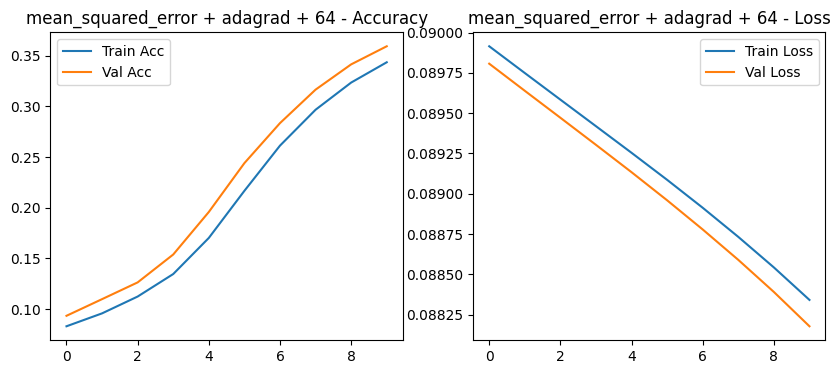

In [ ]:
plot_history(history, f"{loss_fn} + {opt_name} + {batch_size}")

In [ ]:
def build_ann_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model
